# Projeto 6: Classificação multiclasse Iris

## Etapa 1: Importação das bibliotecas

In [1]:
!pip install torch==1.4.0

     |████████████████████████████████| 753.4MB 19kB/s 
ERROR: torchvision 0.8.1+cu101 has requirement torch==1.7.0, but you'll have torch 1.4.0 which is incompatible.
  Found existing installation: torch 1.7.0+cu101
    Uninstalling torch-1.7.0+cu101:
      Successfully uninstalled torch-1.7.0+cu101


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import torch
import torch.nn.functional as F

from torch import nn, optim
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

## Etapa 2: Base de dados

In [3]:
np.random.seed(123)
torch.manual_seed(123)

In [4]:
df = pd.read_csv('/content/iris.csv')

In [7]:
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


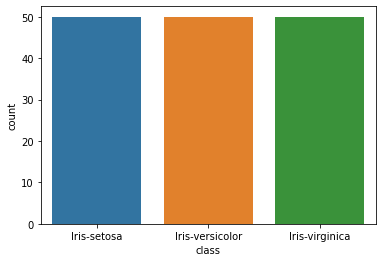

In [8]:
sns.countplot(x='class', data = df);

In [9]:
X = df.iloc[:,0:4].values
y = df.iloc[:,4].values
X.shape, y.shape

((150, 4), (150,))

In [10]:
np.unique(df['class'], return_counts=True)

(array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object),
 array([50, 50, 50]))

In [11]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [12]:
np.unique(y, return_counts=True)

(array([0, 1, 2]), array([50, 50, 50]))

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
X_train.shape, y_train.shape

((112, 4), (112,))

In [14]:
X_test.shape, y_test.shape

((38, 4), (38,))

In [15]:
type(X_train)

numpy.ndarray

In [16]:
X_train = torch.tensor(X_train, dtype = torch.float)
y_train = torch.tensor(y_train, dtype = torch.long)

In [17]:
type(X_train), type(y_train)

(torch.Tensor, torch.Tensor)

## Etapa 3: Construção do modelo

In [19]:
# 4 -> 4 -> 4 -> 3
# (entradas + saídas) / 2 = (4 + 3) / 2 = 3,5

cls = nn.Sequential(
    nn.Linear(4, 4),
    nn.ReLU(),
    nn.Linear(4,4),
    nn.ReLU(),
    nn.Linear(4,3)
)

In [20]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(cls.parameters(), lr = 0.001,
                       weight_decay = 0.0001)

In [22]:
dataset = torch.utils.data.TensorDataset(X_train, y_train)
train_loader = torch.utils.data.DataLoader(dataset, batch_size=10, shuffle=True)

## Etapa 4: Treinamento do modelo

In [25]:
for epoch in range(2000):
  running_loss = 0.
  running_accuracy = 0.

  for data in train_loader:
    inputs, labels = data
    optimizer.zero_grad()

    outputs = cls.forward(inputs)
    loss = criterion(outputs, labels)
    loss.backward()

    outputs = F.softmax(outputs)
    top_p, top_class = outputs.topk(k = 1, dim = 1)

    equals = top_class == labels.view(*top_class.shape)

    running_accuracy += torch.mean(equals.type(torch.float))
    optimizer.step()
    running_loss += loss.item()
  
  print('Época %3d: perda %.5f - accuracy %.5f' % (epoch +1, running_loss/len(train_loader), running_accuracy/len(train_loader)))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  del sys.path[0]


Época   1: perda 0.22612 - accuracy 0.98333
Época   2: perda 0.23628 - accuracy 0.98333
Época   3: perda 0.22318 - accuracy 0.98333
Época   4: perda 0.22966 - accuracy 0.98333
Época   5: perda 0.21807 - accuracy 0.96667
Época   6: perda 0.21813 - accuracy 0.98333
Época   7: perda 0.20361 - accuracy 0.98333
Época   8: perda 0.20826 - accuracy 0.98333
Época   9: perda 0.20430 - accuracy 0.98333
Época  10: perda 0.20036 - accuracy 0.98333
Época  11: perda 0.20067 - accuracy 0.98333
Época  12: perda 0.19224 - accuracy 0.98333
Época  13: perda 0.18937 - accuracy 0.98333
Época  14: perda 0.19994 - accuracy 0.98333
Época  15: perda 0.18113 - accuracy 0.97500
Época  16: perda 0.17829 - accuracy 0.98333
Época  17: perda 0.18862 - accuracy 0.98333
Época  18: perda 0.18383 - accuracy 0.98333
Época  19: perda 0.18113 - accuracy 0.97500
Época  20: perda 0.19089 - accuracy 0.98333
Época  21: perda 0.21120 - accuracy 0.95000
Época  22: perda 0.17477 - accuracy 0.97500
Época  23: perda 0.17601 - accur

## Etapa 5: Avaliação do modelo

In [26]:
cls.eval()

Sequential(
  (0): Linear(in_features=4, out_features=4, bias=True)
  (1): ReLU()
  (2): Linear(in_features=4, out_features=4, bias=True)
  (3): ReLU()
  (4): Linear(in_features=4, out_features=3, bias=True)
)

In [27]:
type(X_test)

numpy.ndarray

In [29]:
X_test = torch.tensor(X_test, dtype = torch.float)

In [30]:
predicted = cls(X_test)

In [31]:
predicted

tensor([[ -8.6032,   1.4298,   0.1954],
        [-12.4687,  -1.9486,   6.4875],
        [-13.8790,  -3.9667,  10.0035],
        [ -4.1503,   5.8108,  -7.8127],
        [ 11.3873,   2.3483, -19.7062],
        [ -8.9135,   1.0689,   0.8399],
        [ -6.4262,   3.5116,  -3.6264],
        [ 10.8065,   2.3130, -18.8291],
        [ 10.4801,   2.2931, -18.3360],
        [ -5.4361,   4.1850,  -4.9399],
        [-12.0925,  -1.6211,   5.8772],
        [ 13.2259,   2.4603, -22.4831],
        [ -4.8670,   4.3453,  -5.3425],
        [-10.9099,  -0.3916,   3.6478],
        [-15.1429,  -3.9280,  10.2844],
        [-14.0166,  -3.7962,   9.7758],
        [ 12.3628,   2.4077, -21.1796],
        [ 10.4925,   2.2938, -18.3548],
        [ -6.6116,   3.6888,  -3.8517],
        [ 10.9415,   2.3212, -19.0330],
        [ 11.9472,   2.3824, -20.5518],
        [ -8.5467,   1.8044,  -0.4017],
        [ 11.6630,   2.3651, -20.1226],
        [ -9.1906,   0.8930,   1.1881],
        [ 12.3747,   2.4084, -21.1975],


In [32]:
F.softmax(predicted)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  """Entry point for launching an IPython kernel.


tensor([[3.4021e-05, 7.7456e-01, 2.2540e-01],
        [5.8523e-09, 2.1685e-04, 9.9978e-01],
        [4.2460e-11, 8.5664e-07, 1.0000e+00],
        [4.7198e-05, 9.9995e-01, 1.2116e-06],
        [9.9988e-01, 1.1868e-04, 3.1350e-14],
        [2.5737e-05, 5.5700e-01, 4.4297e-01],
        [4.8276e-05, 9.9916e-01, 7.9371e-04],
        [9.9980e-01, 2.0474e-04, 1.3469e-13],
        [9.9972e-01, 2.7818e-04, 3.0564e-13],
        [6.6297e-05, 9.9982e-01, 1.0890e-04],
        [1.5690e-08, 5.5372e-04, 9.9945e-01],
        [9.9998e-01, 2.1112e-05, 3.1029e-16],
        [9.9783e-05, 9.9984e-01, 6.2027e-05],
        [4.6780e-07, 1.7303e-02, 9.8270e-01],
        [9.0582e-12, 6.7241e-07, 1.0000e+00],
        [4.6460e-11, 1.2757e-06, 1.0000e+00],
        [9.9995e-01, 4.7482e-05, 2.7082e-15],
        [9.9973e-01, 2.7496e-04, 2.9627e-13],
        [3.3600e-05, 9.9944e-01, 5.3084e-04],
        [9.9982e-01, 1.8037e-04, 9.5981e-14],
        [9.9993e-01, 7.0154e-05, 7.6886e-15],
        [2.8789e-05, 9.0077e-01, 9

In [33]:
predicted = [np.argmax(t) for t in predicted.detach().numpy()]

In [34]:
predicted

[1,
 2,
 2,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 2,
 0,
 1,
 2,
 2,
 2,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 2,
 0,
 0,
 0,
 2,
 2,
 0,
 2,
 2,
 0,
 0,
 1,
 1,
 2,
 0]

In [35]:
matriz = confusion_matrix(predicted, y_test)
matriz

array([[16,  0,  0],
       [ 0,  8,  2],
       [ 0,  0, 12]])

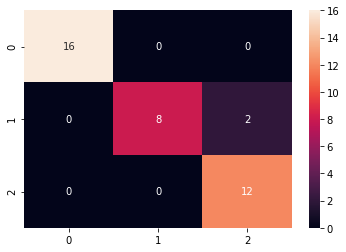

In [37]:
sns.heatmap(matriz, annot=True);